In [5]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

from mne import read_epochs, set_log_level
from mne.decoding import CSP
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [6]:
set_log_level('warning')
epochs = read_epochs('ica_epo.fif')

In [7]:
def dwt_coeff(x, lvl=1, db='db2'):
    coeff = pywt.wavedec(x, db, mode='sym')
    return coeff[lvl]

def avg_pwr(x):
    return np.average(x)

def standarize(array, mean, std):
    return (array-mean)/std

def energy(x):
    return np.sum(x**2)

def std(x):
    return np.std(x)

def max_coeff(x):
    return np.max(x)

def max_coeff(x):
    return np.min(x)


In [8]:
pca = PCA(n_components=0.9)
le = LabelEncoder()
scaler = StandardScaler()
linear_svm = svm.SVC()
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')

Load epochs

In [9]:
conditions = ['left','rest']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.2,300,0)

Vizualize data

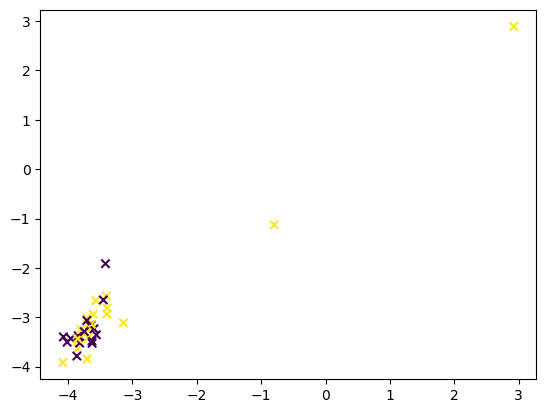

In [10]:
csp = CSP(n_components=12, reg=None, log=True, norm_trace=False, rank='info')
train_data = subset.copy().crop(.4,1.9).filter(60,90).get_data()    
data = csp.fit_transform(train_data, y)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=y, marker='x')

In [11]:
csp_test_classifiers(12,time_config, 7, 2)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
1/1 [==============================] - 1s 834ms/step - loss: 0.3102 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3091 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3079 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3067 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3056 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3044 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 14ms/step - loss: 0.3032 - accuracy: 0.5357
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3021 - accuracy: 0.5357
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3009 - accuracy: 0.5357
Epoch 10/15
1/1 [==============================] - 0s 14ms/step - loss: 0.2997 - accuracy: 0.5357
Epoch 11/15
1/1 [==================

1/1 [==============================] - 0s 139ms/step - loss: 0.3656 - accuracy: 0.1250
Epoch 1/15
1/1 [==============================] - 1s 880ms/step - loss: 0.2549 - accuracy: 0.6071
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2540 - accuracy: 0.6071
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2530 - accuracy: 0.6071
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2521 - accuracy: 0.6071
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2512 - accuracy: 0.6071
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2503 - accuracy: 0.6071
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2494 - accuracy: 0.6071
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2485 - accuracy: 0.6071
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2476 - accuracy: 0.6071
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 0.3312 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 156ms/step - loss: 0.2626 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 546ms/step - loss: 0.3185 - accuracy: 0.2857
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3168 - accuracy: 0.2857
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3151 - accuracy: 0.2857
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3134 - accuracy: 0.2857
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3117 - accuracy: 0.2857
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3100 - accuracy: 0.2857
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3083 - accuracy: 0.2857
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3066 - accuracy: 0.2857
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2710 - accuracy: 0.5357
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2698 - accuracy: 0.5357
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2686 - accuracy: 0.5357
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2673 - accuracy: 0.5357
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2661 - accuracy: 0.5357
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2649 - accuracy: 0.5714
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2637 - accuracy: 0.5714
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2625 - accuracy: 0.5714
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2613 - accuracy: 0.5714
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2602 - accuracy: 0.5714
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2741 - accuracy: 0.5714
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2731 - accuracy: 0.5714
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2720 - accuracy: 0.5714
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2710 - accuracy: 0.5714
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2700 - accuracy: 0.5714
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2689 - accuracy: 0.6071
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2679 - accuracy: 0.6071
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2164 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 524ms/step - loss: 0.2471 - accuracy: 0.6071
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2459 - accuracy: 0.6071
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.3086 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3072 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2892 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 512ms/step - loss: 0.2525 - accuracy: 0.6071
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2513 - accuracy: 0.6071
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2502 - accuracy: 0.6071
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2491 - accuracy: 0.6071
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2479 - accuracy: 0.6071
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2468 - accuracy: 0.6071
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2457 - accuracy: 0.6429
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 7ms/step - loss: 0.2679 - accuracy: 0.4643
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2668 - accuracy: 0.4643
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2657 - accuracy: 0.4643
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2646 - accuracy: 0.4643
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2636 - accuracy: 0.4643
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2625 - accuracy: 0.4643
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2614 - accuracy: 0.4643
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2603 - accuracy: 0.4643
Epoch 10/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2593 - accuracy: 0.4643
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2582 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 5ms/step - loss: 0.2518 - accuracy: 0.5357
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2507 - accuracy: 0.5357
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2496 - accuracy: 0.5357
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2485 - accuracy: 0.5714
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2474 - accuracy: 0.6071
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2463 - accuracy: 0.6071
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2452 - accuracy: 0.6071
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2442 - accuracy: 0.6071
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.3570 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 522ms/step - loss: 0.2656 - accuracy: 0.6071
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 7ms/step - loss: 0.3684 - accuracy: 0.3214
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3668 - accuracy: 0.3214
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3653 - accuracy: 0.3214
Epoch 15/15
1/1 [==============================] - 0s 142ms/step - loss: 0.2122 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 536ms/step - loss: 0.2304 - accuracy: 0.5714
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2288 - accuracy: 0.6429
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2272 - accuracy: 0.6786
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2256 - accuracy: 0.6786
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2240 - accuracy: 0.6786
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2224 - accuracy: 0.6786
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 610ms/step - loss: 0.3577 - accuracy: 0.2500
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3564 - accuracy: 0.3214
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3551 - accuracy: 0.3214
Epoch 4/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3539 - accuracy: 0.3214
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3526 - accuracy: 0.3214
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3513 - accuracy: 0.3214
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3501 - accuracy: 0.3214
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3488 - accuracy: 0.3214
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3476 - accuracy: 0.3214
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3464 - accuracy: 0.3214
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.2194 - accuracy: 0.6071
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2184 - accuracy: 0.6071
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2174 - accuracy: 0.6071
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2165 - accuracy: 0.6071
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2155 - accuracy: 0.6071
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2146 - accuracy: 0.6071
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2137 - accuracy: 0.6071
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2128 - accuracy: 0.6429
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2118 - accuracy: 0.6429
Epoch 15/15
1/1 [==============================] - 0s 130ms/step - loss: 0.2418 - accuracy: 0.5000
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2614 - accuracy: 0.4643
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2607 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2600 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2593 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.2927 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 512ms/step - loss: 0.3577 - accuracy: 0.3214
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3565 - accuracy: 0.3214
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3552 - accuracy: 0.3214
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3540 - accuracy: 0.3214
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3527 - accuracy: 0.3214
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 121ms/step - loss: 0.1746 - accuracy: 0.8750
Epoch 1/15
1/1 [==============================] - 1s 547ms/step - loss: 0.2274 - accuracy: 0.5714
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2266 - accuracy: 0.5714
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2258 - accuracy: 0.5714
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2250 - accuracy: 0.5714
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2242 - accuracy: 0.5714
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2234 - accuracy: 0.5714
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2226 - accuracy: 0.5714
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2218 - accuracy: 0.5714
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2211 - accuracy: 0.5714
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2895 - accuracy: 0.6429
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2885 - accuracy: 0.6429
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2875 - accuracy: 0.6429
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2865 - accuracy: 0.6429
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2855 - accuracy: 0.6429
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2845 - accuracy: 0.6429
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2836 - accuracy: 0.6429
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2826 - accuracy: 0.6429
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2816 - accuracy: 0.6429
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2805 - accuracy: 0.6429
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2237 - accuracy: 0.6429
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2227 - accuracy: 0.6429
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2217 - accuracy: 0.6429
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2207 - accuracy: 0.6429
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2198 - accuracy: 0.6429
Epoch 15/15
1/1 [==============================] - 0s 110ms/step - loss: 0.2915 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 501ms/step - loss: 0.3277 - accuracy: 0.3214
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3260 - accuracy: 0.3214
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3242 - accuracy: 0.3214
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3225 - accuracy: 0.3214
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 123ms/step - loss: 0.2394 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 535ms/step - loss: 0.2646 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2633 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2620 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2607 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2594 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2581 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2568 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2555 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2543 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.4070 - accuracy: 0.3571
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4056 - accuracy: 0.3571
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4041 - accuracy: 0.3571
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4027 - accuracy: 0.3571
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4012 - accuracy: 0.3571
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3998 - accuracy: 0.3571
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3984 - accuracy: 0.3571
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3970 - accuracy: 0.3571
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3955 - accuracy: 0.3571
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3941 - accuracy: 0.3571
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3314 - accuracy: 0.4643
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3303 - accuracy: 0.4643
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3293 - accuracy: 0.4643
Epoch 12/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3282 - accuracy: 0.4643
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3271 - accuracy: 0.4643
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3260 - accuracy: 0.4643
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2851 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 507ms/step - loss: 0.2469 - accuracy: 0.5714
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2456 - accuracy: 0.5714
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2442 - accuracy: 0.5714
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2156 - accuracy: 0.6429
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2493 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 0s 491ms/step - loss: 0.3867 - accuracy: 0.2143
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3851 - accuracy: 0.2143
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3836 - accuracy: 0.2143
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3820 - accuracy: 0.2143
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3805 - accuracy: 0.2143
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3790 - accuracy: 0.2143
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3774 - accuracy: 0.2143
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3759 - accuracy: 0.2143
Epoch 9/15
1/1 [==============================

In [12]:
dwt_test_classifiers(2,'db1',time_config)

Epoch 1/15
1/1 [==============================] - 0s 493ms/step - loss: 0.3853 - accuracy: 0.2143
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3840 - accuracy: 0.2143
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3826 - accuracy: 0.2143
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3813 - accuracy: 0.2143
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3800 - accuracy: 0.2143
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3787 - accuracy: 0.2143
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3774 - accuracy: 0.2143
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3760 - accuracy: 0.2143
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3747 - accuracy: 0.2143
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3734 - accuracy: 0.2143
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 5ms/step - loss: 0.2414 - accuracy: 0.5714
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2402 - accuracy: 0.5714
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2391 - accuracy: 0.6071
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2379 - accuracy: 0.6071
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2368 - accuracy: 0.6071
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2356 - accuracy: 0.6071
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2345 - accuracy: 0.6071
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2334 - accuracy: 0.6071
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2322 - accuracy: 0.6071
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2312 - accuracy: 0.6250
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2978 - accuracy: 0.3571
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2963 - accuracy: 0.3571
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2948 - accuracy: 0.3571
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2933 - accuracy: 0.3571
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.3315 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 0s 492ms/step - loss: 0.2895 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2876 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2857 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2839 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2820 - accuracy: 0.5000
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 111ms/step - loss: 0.2502 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 0s 493ms/step - loss: 0.3448 - accuracy: 0.4286
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3436 - accuracy: 0.4286
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3424 - accuracy: 0.4286
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3412 - accuracy: 0.4286
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3400 - accuracy: 0.4286
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3388 - accuracy: 0.4286
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3376 - accuracy: 0.4286
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3365 - accuracy: 0.4286
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3353 - accuracy: 0.4286
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2881 - accuracy: 0.4286
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2869 - accuracy: 0.4286
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2858 - accuracy: 0.4286
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2847 - accuracy: 0.4286
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2835 - accuracy: 0.4286
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2823 - accuracy: 0.4286
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2812 - accuracy: 0.4286
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2801 - accuracy: 0.4286
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2789 - accuracy: 0.4286
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2778 - accuracy: 0.4286
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.1474 - accuracy: 0.8571
Epoch 11/15
1/1 [==============================] - 0s 4ms/step - loss: 0.1466 - accuracy: 0.8571
Epoch 12/15
1/1 [==============================] - 0s 4ms/step - loss: 0.1457 - accuracy: 0.8571
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1449 - accuracy: 0.8571
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1440 - accuracy: 0.8571
Epoch 15/15
1/1 [==============================] - 0s 110ms/step - loss: 0.1713 - accuracy: 0.8750
Epoch 1/15
1/1 [==============================] - 1s 537ms/step - loss: 0.4303 - accuracy: 0.3929
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4291 - accuracy: 0.3929
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4278 - accuracy: 0.3929
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4266 - accuracy: 0.3929
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 133ms/step - loss: 0.1954 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 592ms/step - loss: 0.3262 - accuracy: 0.3214
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3251 - accuracy: 0.3571
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3240 - accuracy: 0.3571
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3229 - accuracy: 0.3571
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3218 - accuracy: 0.3571
Epoch 6/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3206 - accuracy: 0.3571
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3195 - accuracy: 0.3571
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3184 - accuracy: 0.3571
Epoch 9/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3173 - accuracy: 0.3571
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2465 - accuracy: 0.5714
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2457 - accuracy: 0.5714
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2448 - accuracy: 0.5714
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2440 - accuracy: 0.5714
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2431 - accuracy: 0.5714
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2422 - accuracy: 0.5714
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2414 - accuracy: 0.5714
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2405 - accuracy: 0.5714
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2396 - accuracy: 0.5714
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2387 - accuracy: 0.5714
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2349 - accuracy: 0.5357
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2326 - accuracy: 0.5357
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2304 - accuracy: 0.5357
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2282 - accuracy: 0.5357
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2259 - accuracy: 0.5357
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2237 - accuracy: 0.5357
Epoch 15/15
1/1 [==============================] - 0s 135ms/step - loss: 0.3991 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 522ms/step - loss: 0.2943 - accuracy: 0.3929
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2932 - accuracy: 0.3214
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2922 - accuracy: 0.3214
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2832 - accuracy: 0.5714
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.3051 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 500ms/step - loss: 0.2746 - accuracy: 0.6071
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2733 - accuracy: 0.6071
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2720 - accuracy: 0.6429
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.6429
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2695 - accuracy: 0.6429
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2682 - accuracy: 0.6786
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2669 - accuracy: 0.6786
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2657 - accuracy: 0.6786
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3835 - accuracy: 0.3571
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3821 - accuracy: 0.3571
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3807 - accuracy: 0.3571
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3793 - accuracy: 0.3571
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3779 - accuracy: 0.3571
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3765 - accuracy: 0.3571
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3752 - accuracy: 0.3929
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3738 - accuracy: 0.3929
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3724 - accuracy: 0.3929
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3711 - accuracy: 0.3929
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.2767 - accuracy: 0.5357
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2757 - accuracy: 0.5357
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2748 - accuracy: 0.5357
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2738 - accuracy: 0.5357
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2729 - accuracy: 0.5357
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2720 - accuracy: 0.5357
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2711 - accuracy: 0.5714
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2698 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 512ms/step - loss: 0.2641 - accuracy: 0.6071
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2632 - accuracy: 0.6071
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2122 - accuracy: 0.7500
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2106 - accuracy: 0.7857
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.3184 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 0s 497ms/step - loss: 0.1923 - accuracy: 0.7500
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1909 - accuracy: 0.7500
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1894 - accuracy: 0.7500
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1879 - accuracy: 0.7500
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1865 - accuracy: 0.7857
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1850 - accuracy: 0.7857
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1836 - accuracy: 0.7857
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3438 - accuracy: 0.4286
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3420 - accuracy: 0.4286
Epoch 4/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3402 - accuracy: 0.4286
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3385 - accuracy: 0.4286
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3367 - accuracy: 0.4286
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3349 - accuracy: 0.4286
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3332 - accuracy: 0.4286
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3314 - accuracy: 0.4286
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3297 - accuracy: 0.4286
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3280 - accuracy: 0.4286
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.2020 - accuracy: 0.7143
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2003 - accuracy: 0.7143
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1987 - accuracy: 0.7143
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1970 - accuracy: 0.7143
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1954 - accuracy: 0.7143
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1938 - accuracy: 0.7500
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1922 - accuracy: 0.7500
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1906 - accuracy: 0.7500
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.2096 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 529ms/step - loss: 0.3238 - accuracy: 0.3929
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2627 - accuracy: 0.4643
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2621 - accuracy: 0.4643
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2615 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2363 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 0s 496ms/step - loss: 0.2894 - accuracy: 0.5357
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2882 - accuracy: 0.5357
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2871 - accuracy: 0.5357
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2860 - accuracy: 0.5357
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2848 - accuracy: 0.5357
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2837 - accuracy: 0.5357
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 927ms/step - loss: 0.3212 - accuracy: 0.3929
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3199 - accuracy: 0.3929
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3187 - accuracy: 0.3929
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3174 - accuracy: 0.3929
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3162 - accuracy: 0.3929
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3150 - accuracy: 0.3929
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3137 - accuracy: 0.3929
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3125 - accuracy: 0.3929
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3113 - accuracy: 0.3929
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3101 - accuracy: 0.3929
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.3574 - accuracy: 0.2857
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3558 - accuracy: 0.2857
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3543 - accuracy: 0.2857
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3528 - accuracy: 0.2857
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3512 - accuracy: 0.2857
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3497 - accuracy: 0.2857
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3482 - accuracy: 0.2857
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3466 - accuracy: 0.2857
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3451 - accuracy: 0.2857
Epoch 15/15
1/1 [==============================] - 0s 110ms/step - loss: 0.2917 - accuracy: 0.5000
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.1947 - accuracy: 0.6429
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1935 - accuracy: 0.6429
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1923 - accuracy: 0.6429
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1911 - accuracy: 0.6429
Epoch 15/15
1/1 [==============================] - 0s 218ms/step - loss: 0.2383 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 526ms/step - loss: 0.3549 - accuracy: 0.4643
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3538 - accuracy: 0.4643
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3527 - accuracy: 0.4286
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3516 - accuracy: 0.4286
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3505 - accuracy: 0.4286
Epoch 6/15
1/1 [===========================

left vs right

In [13]:
conditions = ['left','right']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.2,400,100)

In [14]:
csp_test_classifiers(4,time_config, 7, 2)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
1/1 [==============================] - 1s 611ms/step - loss: 0.2398 - accuracy: 0.6071
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2379 - accuracy: 0.6429
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2360 - accuracy: 0.6429
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2342 - accuracy: 0.6429
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2323 - accuracy: 0.6429
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2306 - accuracy: 0.6786
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2287 - accuracy: 0.6786
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2270 - accuracy: 0.6786
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2252 - accuracy: 0.6786
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2235 - accuracy: 0.6786
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 6ms/step - loss: 0.2421 - accuracy: 0.5714
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2398 - accuracy: 0.5714
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2376 - accuracy: 0.5714
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2353 - accuracy: 0.5714
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2331 - accuracy: 0.5714
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2309 - accuracy: 0.5714
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2286 - accuracy: 0.5714
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2265 - accuracy: 0.5714
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2243 - accuracy: 0.5714
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.2451 - accuracy: 0.6250
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5714
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2478 - accuracy: 0.5714
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2462 - accuracy: 0.5714
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2446 - accuracy: 0.5714
Epoch 15/15
1/1 [==============================] - 0s 174ms/step - loss: 0.3282 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 502ms/step - loss: 0.2947 - accuracy: 0.5714
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2931 - accuracy: 0.5714
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2914 - accuracy: 0.5714
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2898 - accuracy: 0.5714
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2881 - accuracy: 0.5357
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 133ms/step - loss: 0.2055 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 551ms/step - loss: 0.2676 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2656 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2636 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2597 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2578 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2558 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2539 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2520 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2374 - accuracy: 0.6786
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2357 - accuracy: 0.6786
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2341 - accuracy: 0.6786
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2325 - accuracy: 0.6786
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2309 - accuracy: 0.6786
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2294 - accuracy: 0.6786
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2278 - accuracy: 0.6786
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2263 - accuracy: 0.6786
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2248 - accuracy: 0.6786
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2233 - accuracy: 0.6786
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2442 - accuracy: 0.6071
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2428 - accuracy: 0.6071
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2414 - accuracy: 0.6071
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2399 - accuracy: 0.6071
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2385 - accuracy: 0.6429
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.1936 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 509ms/step - loss: 0.2873 - accuracy: 0.5714
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2854 - accuracy: 0.5714
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2834 - accuracy: 0.5714
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2815 - accuracy: 0.5714
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 116ms/step - loss: 0.3209 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 0s 493ms/step - loss: 0.2635 - accuracy: 0.5714
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2624 - accuracy: 0.5714
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2613 - accuracy: 0.5714
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2602 - accuracy: 0.5714
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2591 - accuracy: 0.5714
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2580 - accuracy: 0.5714
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2569 - accuracy: 0.5714
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2558 - accuracy: 0.5714
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2547 - accuracy: 0.5714
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.1921 - accuracy: 0.7143
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1906 - accuracy: 0.7500
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1892 - accuracy: 0.7500
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1877 - accuracy: 0.7500
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1863 - accuracy: 0.7500
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1849 - accuracy: 0.7500
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1835 - accuracy: 0.7500
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1822 - accuracy: 0.7857
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1809 - accuracy: 0.7857
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1796 - accuracy: 0.7857
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2079 - accuracy: 0.6786
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2066 - accuracy: 0.6786
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2053 - accuracy: 0.6786
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2040 - accuracy: 0.6786
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2027 - accuracy: 0.6786
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2014 - accuracy: 0.6786
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2115 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 576ms/step - loss: 0.2919 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2895 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2871 - accuracy: 0.5000
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.1510 - accuracy: 0.7143
Epoch 15/15
1/1 [==============================] - 0s 130ms/step - loss: 0.3486 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 541ms/step - loss: 0.2275 - accuracy: 0.6071
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2254 - accuracy: 0.6071
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2234 - accuracy: 0.6071
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2213 - accuracy: 0.6071
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2193 - accuracy: 0.6071
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2173 - accuracy: 0.6071
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2153 - accuracy: 0.6071
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2134 - accuracy: 0.6071
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.1929 - accuracy: 0.6429
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1910 - accuracy: 0.6786
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1890 - accuracy: 0.7143
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1871 - accuracy: 0.7143
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1853 - accuracy: 0.7143
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1835 - accuracy: 0.7500
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1817 - accuracy: 0.7500
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1800 - accuracy: 0.7500
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1783 - accuracy: 0.7500
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1767 - accuracy: 0.7500
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.3434 - accuracy: 0.4643
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3416 - accuracy: 0.4643
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3398 - accuracy: 0.4643
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3379 - accuracy: 0.4643
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3361 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3342 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3324 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.2661 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 532ms/step - loss: 0.3178 - accuracy: 0.6071
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3163 - accuracy: 0.6071
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3067 - accuracy: 0.3571
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3041 - accuracy: 0.3571
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.1987 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 508ms/step - loss: 0.2763 - accuracy: 0.5357
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2745 - accuracy: 0.4643
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2727 - accuracy: 0.5357
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2709 - accuracy: 0.5357
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2691 - accuracy: 0.5357
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2673 - accuracy: 0.5357
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2655 - accuracy: 0.5357
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2346 - accuracy: 0.6071
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2326 - accuracy: 0.6071
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2306 - accuracy: 0.6071
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2286 - accuracy: 0.6071
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2268 - accuracy: 0.6429
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2249 - accuracy: 0.6429
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2232 - accuracy: 0.6429
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2214 - accuracy: 0.6429
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2197 - accuracy: 0.6429
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2180 - accuracy: 0.6429
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.3459 - accuracy: 0.3929
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3437 - accuracy: 0.3929
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3416 - accuracy: 0.3929
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3394 - accuracy: 0.3929
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3372 - accuracy: 0.3929
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3349 - accuracy: 0.3929
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3327 - accuracy: 0.3929
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3304 - accuracy: 0.3929
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.2401 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 0s 493ms/step - loss: 0.3455 - accuracy: 0.3571
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3949 - accuracy: 0.1786
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3924 - accuracy: 0.1786
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3900 - accuracy: 0.1786
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.1924 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 0s 494ms/step - loss: 0.3115 - accuracy: 0.3571
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3092 - accuracy: 0.3929
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3069 - accuracy: 0.3929
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3046 - accuracy: 0.4286
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3023 - accuracy: 0.4286
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3000 - accuracy: 0.4286
Epoch 7/15
1/1 [============================

1/1 [==============================] - 0s 491ms/step - loss: 0.2397 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2377 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2357 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2338 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2318 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2298 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2278 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2259 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2219 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.1955 - accuracy: 0.7500
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1939 - accuracy: 0.7500
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1923 - accuracy: 0.7857
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1908 - accuracy: 0.7857
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1893 - accuracy: 0.7857
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1878 - accuracy: 0.7857
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1864 - accuracy: 0.7857
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1849 - accuracy: 0.7857
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1836 - accuracy: 0.7857
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.3592 - accuracy: 0.5000
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2972 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2954 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2937 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2919 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 145ms/step - loss: 0.2393 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 514ms/step - loss: 0.2790 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2775 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2760 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2744 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2729 - accuracy: 0.5000
Epoch 6/15
1/1 [===========================

In [15]:
dwt_test_classifiers(2,'db1',time_config)

Epoch 1/15
1/1 [==============================] - 1s 610ms/step - loss: 0.3126 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3105 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3084 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3063 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3042 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3022 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3001 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2980 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2959 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2938 - accuracy: 0.5000
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 6ms/step - loss: 0.2179 - accuracy: 0.6429
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2164 - accuracy: 0.6429
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2148 - accuracy: 0.6786
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2133 - accuracy: 0.6786
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2117 - accuracy: 0.6786
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2102 - accuracy: 0.6786
Epoch 12/15
1/1 [==============================] - 0s 13ms/step - loss: 0.2087 - accuracy: 0.6786
Epoch 13/15
1/1 [==============================] - 0s 16ms/step - loss: 0.2071 - accuracy: 0.6786
Epoch 14/15
1/1 [==============================] - 0s 20ms/step - loss: 0.2056 - accuracy: 0.6786
Epoch 15/15
1/1 [==============================] - 0s 125ms/step - loss: 0.2150 - accuracy: 0.6250
Epoch 1/15
1/1 [========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2269 - accuracy: 0.6071
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2257 - accuracy: 0.6071
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2246 - accuracy: 0.6071
Epoch 14/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2234 - accuracy: 0.6071
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.1657 - accuracy: 0.8750
Epoch 1/15
1/1 [==============================] - 1s 523ms/step - loss: 0.2781 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2768 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2756 - accuracy: 0.5357
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2744 - accuracy: 0.5357
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2732 - accuracy: 0.5357
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 117ms/step - loss: 0.2603 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 999ms/step - loss: 0.2854 - accuracy: 0.4286
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2840 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2825 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2811 - accuracy: 0.5357
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2797 - accuracy: 0.5357
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2783 - accuracy: 0.5357
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2769 - accuracy: 0.5357
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2755 - accuracy: 0.5357
Epoch 9/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2741 - accuracy: 0.5357
Epoch 10/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2925 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2906 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2888 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2869 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2851 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2833 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2815 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2797 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2779 - accuracy: 0.5357
Epoch 14/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2762 - accuracy: 0.5714
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3489 - accuracy: 0.5357
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3475 - accuracy: 0.5357
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3460 - accuracy: 0.5357
Epoch 13/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3446 - accuracy: 0.5357
Epoch 14/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3431 - accuracy: 0.5357
Epoch 15/15
1/1 [==============================] - 0s 151ms/step - loss: 0.4207 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 996ms/step - loss: 0.2850 - accuracy: 0.6071
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2836 - accuracy: 0.6429
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2821 - accuracy: 0.6429
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2806 - accuracy: 0.6429
Epoch 5/15
1/1 [=========================

1/1 [==============================] - 0s 194ms/step - loss: 0.2107 - accuracy: 0.8750
Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 0.3128 - accuracy: 0.5357
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3111 - accuracy: 0.5357
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3095 - accuracy: 0.5357
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3078 - accuracy: 0.5357
Epoch 5/15
1/1 [==============================] - 0s 13ms/step - loss: 0.3063 - accuracy: 0.5357
Epoch 6/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3047 - accuracy: 0.5357
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3031 - accuracy: 0.5357
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3016 - accuracy: 0.5357
Epoch 9/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3001 - accuracy: 0.5357
Epoch 10/15
1/1 [==============================] 

1/1 [==============================] - 0s 9ms/step - loss: 0.2599 - accuracy: 0.5714
Epoch 5/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2583 - accuracy: 0.5714
Epoch 6/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2567 - accuracy: 0.5714
Epoch 7/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2552 - accuracy: 0.6071
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2536 - accuracy: 0.6071
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2520 - accuracy: 0.6071
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2505 - accuracy: 0.6071
Epoch 11/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2490 - accuracy: 0.6429
Epoch 12/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2475 - accuracy: 0.6429
Epoch 13/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2460 - accuracy: 0.6429
Epoch 14/15
1/1 [=============================

1/1 [==============================] - 0s 7ms/step - loss: 0.2724 - accuracy: 0.5357
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2710 - accuracy: 0.5357
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2695 - accuracy: 0.5357
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2681 - accuracy: 0.5357
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2667 - accuracy: 0.5357
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2653 - accuracy: 0.5357
Epoch 15/15
1/1 [==============================] - 0s 157ms/step - loss: 0.3865 - accuracy: 0.1250
Epoch 1/15
1/1 [==============================] - 1s 774ms/step - loss: 0.3924 - accuracy: 0.4286
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3902 - accuracy: 0.4286
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3881 - accuracy: 0.4286
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2931 - accuracy: 0.5357
Epoch 15/15
1/1 [==============================] - 0s 125ms/step - loss: 0.2536 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 807ms/step - loss: 0.2456 - accuracy: 0.5357
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2440 - accuracy: 0.5357
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2425 - accuracy: 0.5357
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2409 - accuracy: 0.5714
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2393 - accuracy: 0.5714
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2378 - accuracy: 0.5714
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2364 - accuracy: 0.5714
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2349 - accuracy: 0.5714
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 9ms/step - loss: 0.2487 - accuracy: 0.6071
Epoch 4/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2472 - accuracy: 0.6071
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2457 - accuracy: 0.6071
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2442 - accuracy: 0.6071
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2427 - accuracy: 0.6071
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2413 - accuracy: 0.6071
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2398 - accuracy: 0.6429
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2384 - accuracy: 0.6429
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2370 - accuracy: 0.6786
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2356 - accuracy: 0.6786
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2247 - accuracy: 0.6429
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.6786
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2230 - accuracy: 0.6786
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2222 - accuracy: 0.6786
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2214 - accuracy: 0.6786
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2206 - accuracy: 0.6786
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2198 - accuracy: 0.6786
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.2842 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 805ms/step - loss: 0.3101 - accuracy: 0.4286
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3081 - accuracy: 0.4286
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2714 - accuracy: 0.5714
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2693 - accuracy: 0.5714
Epoch 15/15
1/1 [==============================] - 0s 133ms/step - loss: 0.2702 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 632ms/step - loss: 0.2566 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2552 - accuracy: 0.5357
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2537 - accuracy: 0.5357
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2523 - accuracy: 0.5357
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2509 - accuracy: 0.5357
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2494 - accuracy: 0.5357
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2480 - accuracy: 0.5357
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3348 - accuracy: 0.4286
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3331 - accuracy: 0.4286
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3313 - accuracy: 0.4286
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3296 - accuracy: 0.4286
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3278 - accuracy: 0.4286
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3260 - accuracy: 0.4286
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3243 - accuracy: 0.4286
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3225 - accuracy: 0.4286
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3208 - accuracy: 0.4286
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3190 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.2472 - accuracy: 0.5714
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2454 - accuracy: 0.5714
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2436 - accuracy: 0.5714
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2419 - accuracy: 0.5714
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2401 - accuracy: 0.5714
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2384 - accuracy: 0.5714
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2366 - accuracy: 0.5714
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2349 - accuracy: 0.5714
Epoch 15/15
1/1 [==============================] - 0s 131ms/step - loss: 0.3115 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 648ms/step - loss: 0.2694 - accuracy: 0.5714
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 7ms/step - loss: 0.2893 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2875 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2858 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 132ms/step - loss: 0.2637 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 626ms/step - loss: 0.2715 - accuracy: 0.4286
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2703 - accuracy: 0.4286
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2691 - accuracy: 0.4643
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2679 - accuracy: 0.4643
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2667 - accuracy: 0.4643
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2655 - accuracy: 0.4643
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 754ms/step - loss: 0.2141 - accuracy: 0.6786
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2125 - accuracy: 0.6786
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2109 - accuracy: 0.6786
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2093 - accuracy: 0.6786
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2078 - accuracy: 0.7143
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2062 - accuracy: 0.7143
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2047 - accuracy: 0.7143
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2032 - accuracy: 0.7143
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2016 - accuracy: 0.7143
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2001 - accuracy: 0.7143
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 9ms/step - loss: 0.2560 - accuracy: 0.6786
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2549 - accuracy: 0.6786
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2537 - accuracy: 0.6786
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2525 - accuracy: 0.6786
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2514 - accuracy: 0.6786
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2502 - accuracy: 0.6786
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2490 - accuracy: 0.6786
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2478 - accuracy: 0.6786
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2466 - accuracy: 0.6786
Epoch 15/15
1/1 [==============================] - 0s 187ms/step - loss: 0.2571 - accuracy: 0.6250
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2522 - accuracy: 0.5714
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2513 - accuracy: 0.5714
Epoch 13/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2504 - accuracy: 0.5714
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2495 - accuracy: 0.5714
Epoch 15/15
1/1 [==============================] - 0s 142ms/step - loss: 0.2235 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 832ms/step - loss: 0.2958 - accuracy: 0.4643
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2944 - accuracy: 0.4643
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2930 - accuracy: 0.4643
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2917 - accuracy: 0.4643
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2903 - accuracy: 0.4643
Epoch 6/15
1/1 [===========================

In [1]:
def csp_test_classifiers(n_components, time_config, fmax, fmin):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()    
    
    csp = CSP(n_components=n_components, reg=None, log=True, norm_trace=False, rank='info')
    median_score = []
    
    csp_data = csp.fit_transform(train_data,y)
    rbf_svm = find_best_svc_params(csp_data, y)
    nu_svm = find_best_svc_params(csp_data, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            csp.fit(train_data[train_idx], y_train)
            w_min = 0
            for i in range(n_windows):
                w_max = w_min + width
                X.append(csp.transform(train_data[train_idx, :, w_min:w_max]))
                X_tst.append(csp.transform(train_data[test_idx, :, w_min:w_max]))
                w_min += w_max - overlap
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            
            if X.shape[1] > 12:
                X = pca.fit_transform(X)
                X_tst = pca.transform(X_tst)
    
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)
            
            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [2]:
def dwt_test_classifiers(lvl, db, time_config):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,t_min+.8).get_data()    
    x = np.apply_along_axis(dwt_coeff, 2, train_data, lvl=lvl, db=db)
    X = []
    X.append(np.apply_along_axis(np.mean, 2, x))
    X.append(np.apply_along_axis(energy, 2, x))
    X.append(np.apply_along_axis(np.std, 2, x))
    X.append(np.apply_along_axis(np.max, 2, x))
    X.append(np.apply_along_axis(np.min, 2, x))
    X = np.concatenate(X, axis=1)
    x = pca.fit_transform(X)
    x = scaler.fit_transform(x)
    rbf_svm = find_best_svc_params(x, y)
    nu_svm = find_best_svc_params(x, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            x_tr = np.apply_along_axis(dwt_coeff, 2, train_data[train_idx], lvl=lvl, db=db)
            X.append(np.apply_along_axis(np.mean, 2, x_tr))
            X.append(np.apply_along_axis(energy, 2, x_tr))
            X.append(np.apply_along_axis(np.std, 2, x_tr))
            X.append(np.apply_along_axis(np.max, 2, x_tr))
            X.append(np.apply_along_axis(np.min, 2, x_tr))
            
            X_tst = []
            x_tst = np.apply_along_axis(dwt_coeff, 2, train_data[test_idx], lvl = lvl, db=db)
            X_tst.append(np.apply_along_axis(np.mean, 2, x_tst))
            X_tst.append(np.apply_along_axis(energy, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.std, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.max, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.min, 2, x_tst))
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            X = pca.fit_transform(X)
            X_tst = pca.transform(X_tst)
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)

            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [3]:
def find_best_svc_params(X,ym, kernel='rbf'):
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    if kernel == 'nu':
        param_grid = dict(gamma=gamma_range)
        grid = GridSearchCV(svm.NuSVC(), param_grid=param_grid, cv=cv)
    else:   
        grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    grid.fit(X,y)
    return grid.best_estimator_

In [4]:
def shallow_model(features):
    model = Sequential()
    model.add(Dense(int(features/2), input_shape=(features,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model
